In [2]:
import keras
import numpy as np
from keras import datasets
from numpy.linalg import eig 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from numpy import cov
from keras.datasets import mnist
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape((10000, 28 * 28))
x_train = x_train / 255
x_test = x_test / 255

mean = np.mean(x_train, axis=0)
centered = x_train - mean

cov_mat = cov(centered.T)
eig_val, eig_vec = eig(cov_mat)

In [4]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [6]:
two_d = centered.dot(eig_vec[:, :2])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


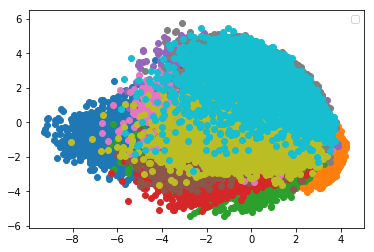

In [17]:
for i in range(10):
    points = two_d[y_train == i]
    plt.scatter(points[:,0], points[:,1])
    plt.legend()

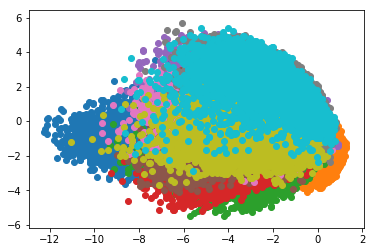

In [9]:
two = x_train.dot(eig_vec[:, :2])
for i in range(10):
    points = two[y_train == i]
    plt.scatter(points[:,0], points[:,1])

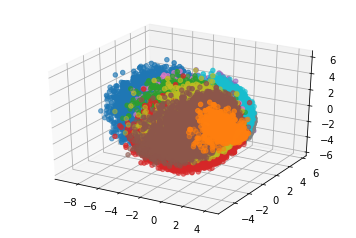

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


three = centered.dot(eig_vec[:, :3])
for i in range(10):
    points = three[y_train == i]
    ax.scatter(points[:,0], points[:,1], points[:, 2])

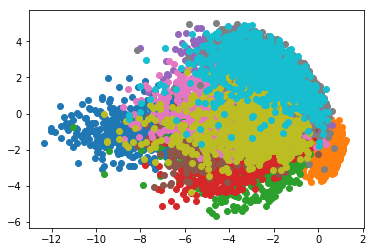

In [5]:
two = x_test.dot(eig_vec[:, :2])
for i in range(10):
    points = two[y_test == i]
    plt.scatter(points[:,0], points[:,1])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


three = centered.dot(eig_vec[:, :3])
for i in range(10):
    points = three[y_train == i]
    ax.scatter(points[:,0], points[:,1], points[:, 2])